In [2]:
import os
os.chdir('/Users/jonas/Desktop/Books/Think Stats 2 - Allen B Downey/ThinkStats2-master/code')

In [3]:
import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [6]:
df = nsfg.ReadFemPreg()
live = df[df.outcome == 1]

In [8]:
hist = thinkstats2.Hist([1,2,2,3,5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

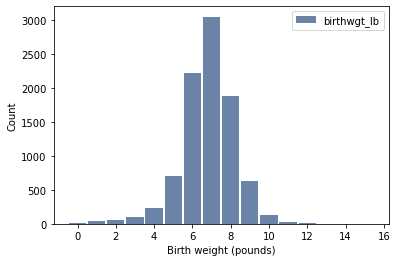

In [8]:
# birth histogram

hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

In [9]:
# normalizing a distribution

n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

In [10]:
pmf

Hist({7.0: 0.3356450902686041, 6.0: 0.24471598414795245, 8.0: 0.2079480405107882, 5.0: 0.07672831351827389, 9.0: 0.06858212241303391, 4.0: 0.025209158960810215, 10.0: 0.01453104359313078, 3.0: 0.01078819903126376, 2.0: 0.005834434169969176, 1.0: 0.004403346543372964, 11.0: 0.0028621752531924264, 12.0: 0.001100836635843241, 0.0: 0.0008806693086745927, 13.0: 0.00033025099075297226, 14.0: 0.00033025099075297226, 15.0: 0.00011008366358432408}, 'birthwgt_lb')

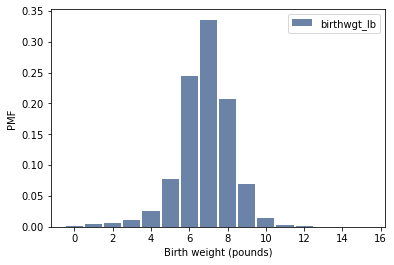

In [11]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

In [12]:
# We can create a PMF object

pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [13]:
pmf.Prob(2) # getting a values probability

0.4

In [14]:
pmf.Incr(2, 0.2) # adding 0.2 to the probability of 2
pmf[2]

0.6000000000000001

In [15]:
pmf.Mult(2, 0.5) # multiply probability
pmf[2]

0.30000000000000004

In [16]:
pmf.Total() # getting the total ( no longer 1 since we changed it above )

0.8999999999999999

In [17]:
pmf.Normalize() # getting 1
pmf.Total()

1.0

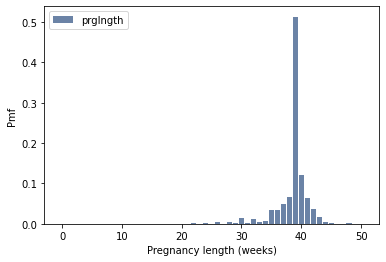

In [19]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

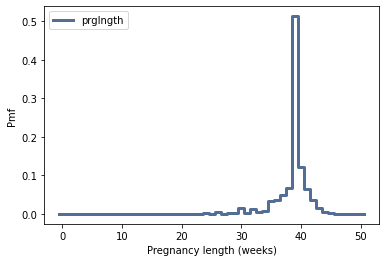

In [20]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf') # pmf makes it a step function

In [24]:
live, firsts, others = first.MakeFrames()

In [25]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

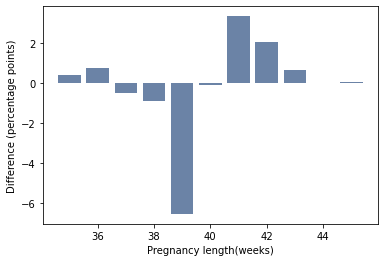

In [26]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')
# difference in percentage points by week

In [27]:
# Suppose we have the following distribution of class sizes
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')

# This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

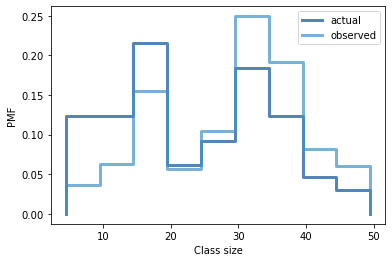

In [28]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

# true / biased pmfs

**Exercise:** In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [30]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

In [33]:

def ObservedPmf(pmf, speed, label=None):
    """Returns a new Pmf representing speeds observed at a given speed.

    The chance of observing a runner is proportional to the difference
    in speed.

    Args:
        pmf: distribution of actual speeds
        speed: speed of the observing runner
        label: string label for the new dist

    Returns:
        Pmf object
    """
    new = pmf.Copy(label=label)
    for val in new.Values():
        diff = abs(val - speed)
        new.Mult(val, diff)
    new.Normalize()
    return new


def main():
    results = relay.ReadResults()
    speeds = relay.GetSpeeds(results)
    speeds = relay.BinData(speeds, 3, 12, 100)

    # plot the distribution of actual speeds
    pmf = thinkstats2.Pmf(speeds, 'actual speeds')

    # plot the biased distribution seen by the observer
    biased = ObservedPmf(pmf, 7.5, label='observed speeds')

    thinkplot.Pmf(biased)
    
    thinkplot.Save(root='observed_speeds',
                   title='PMF of running speed',
                   xlabel='speed (mph)',
                   ylabel='PMF')

    cdf = thinkstats2.Cdf(pmf)
    cdf_biased = thinkstats2.Cdf(biased)

    thinkplot.PrePlot(2)
    thinkplot.Cdfs([cdf, cdf_biased])
    thinkplot.Save(root='observed_speeds_cdf',
                   title='CDF of running speed',
                   xlabel='speed (mph)',
                   ylabel='CDF')

In [35]:
main()

Writing observed_speeds.pdf
Writing observed_speeds.png
Writing observed_speeds_cdf.pdf
Writing observed_speeds_cdf.png


<Figure size 576x432 with 0 Axes>